In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics

from sklearn.naive_bayes import CategoricalNB

# Multunomiale Naive Bayes

## I) Theory

Naive Bayes models are a type of classification algorithm that is fast, simple and is suitable for classification probleme because the data set is high-dimensional.
This model will be a baseline for our Multi-Class classification problem since they are so fast and have so few configurable parameters.

### 1) Equations

The model is based on Bayes theorem, an equation that describes the relationship between conditional probabilities of statistical quantities.
We want to find the probability of a Sector $S$ given certain observed features in Bayesian classification, which we can write as $P(S|rm features)$.
We have with the Bayes theorem that :

$$
P(S~|~{\rm features}) = \frac{P({\rm features}~|~S)P(S)}{P({\rm features})}
$$

If we want to choose between two labels, let's call them $S_1$ and $S_2$, one technique to do so is to compute the ratio of their posterior probabilities:

$$
\frac{P(S_1~|~{\rm features})}{P(S_2~|~{\rm features})} = \frac{P({\rm features}~|~S_1)}{P({\rm features}~|~S_2)}\frac{P(S_1)}{P(S_2)}
$$


All we need now is a model that can calculate $P(rm features|S_i)$ for each label.
A *generative model* is one that specifies specifies the hypothetical random process that generates the data.
The fundamental component of training a Bayesian classifier is specifying this generative model for each label.
The general version of such a training phase is a challenging operation, but we may simplify it by making some simplifying assumptions about the model's shape.

In the next part of this notebook we will use Categorical Naive Bayes because it's the one that best fits our problem.

### 2) Categorical Naive Bayes

It is assumed that the features are generated by a basic multinomial distribution.
Because the multinomial distribution explains the chance of detecting counts across several categories, categorical naive Bayes is best suited for features that represent counts or count rates.

## II) Advantages and Drawbacks

Advantages :
- This algorithm works very fast and can easily predict the class of a test dataset. 
- For very high-dimensional data, when model complexity is less important
- Naive Bayes classifier performs better than other models with less training data if the assumption of independence of features holds. 
- They provide straightforward probabilistic prediction.
- They are often easily interpretable.
- They have few (if any) tunable parameters.

These advantages mean a naive Bayes classifier is often a good choice as an initial baseline classification.

!!!!!!!! A réécrire !!!!!!!
The final two statements appear to be unrelated, but they are: as the dimensionality of a dataset increases, it becomes far less likely that any two points will be located near together (after all, they must be close in *every single dimension* to be close overall).
This suggests that clusters in high dimensions are more separated than clusters in low dimensions on average, provided the new dimensions add information.
As a result, as the dimensionality increases, simplest classifiers like the ones mentioned here tend to perform as well as or better than more complicated classifiers: provided you have enough data, even a simple model can be very strong.
!!!!!!!! A réécrire !!!!!!!

drawbacks :
- If your test data set contains a categorical variable from a category that was not present in the training data set, the Naive Bayes model will assign it zero probability and will be unable to make predictions. This phenomena is known as 'Zero Frequency,' and it must be solved using a smoothing process.
- This approach is also known for being a poor estimator. As a result, you shouldn't take the 'predict_proba' probability results too seriously. 
- It is assumed that all of the features are self-contained. While it may seem excellent in principle, it is rare to find a collection of independent traits in practice. 

## II) Python implementation

As this model represents the baseline, we're going to detail each important step so that we can automate this part for the other models.

As this model is just a baseline, we won't go into the details of Grid Research or Cross Validation. Indeed, this model will never be used in the future, as our data set is so imbalanced that certain probabilities are likely to be zero if they are not in the train set.

### 1) Importing and setting up data

We'll start by importing the data and structuring it for further processing, by removing columns of no interest and rows without labels. Then we'll separate the dataset into two parts: the training part, which represents 80% of the data we have, and the test part, for the remaining 20%.


In [35]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop(labels=22426, axis=0)

y = df[["Secteur"]]
df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

X_train.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_train.csv')
X_test.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_test.csv')
y_train.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_train.csv')
y_test.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_test.csv')

### 2) Hyperparameters tuning

Despite the fact that this model only represents a baseline for our project, and that we know in advance, given the presence of an imbalanced dataset, that certain sectors will have a zero probability of appearing, we know that this model will not be used in the future. However, the naive bayes classifier will be used to introduce the various concepts and algorithms we'll be using later.
There are different hyperparameters that needs tuning to get best fit for our data.

- alpha:
It accepts float values that represent the additive smoothing parameter alpha. A value of 0.0 indicates that there is no smoothing. This parameter's default value is 1.0.

- fit_prior:
It receives a boolean value indicating whether or not to learn prior class probability.

- min_categories:
It provides an integer or an array of shape (n_features,) defining the minimum categories to consider for each feature.

- class_prior:
class_prior accepts arrays of the form (n_classes,) which specify the prior probability of target classes.


### 3) Study of the various hyperparameters

Next, we'll look at each of the hyperparameters to understand the consequences of changing them on the model.

#### Alpha

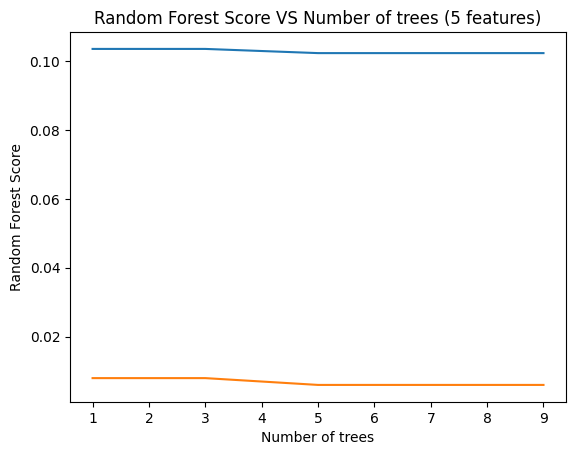

In [37]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0.01, 0.1, 0.5, 1.0, 10.0, ]

for i in list_para:
    model = CategoricalNB(alpha=i,min_categories=31)
    model.fit(X_train,y_train.values.ravel())
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(range(min, max, steps), opt_table_estimators_accuracy)
plt.plot(range(min, max, steps), opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

### 4) Automatisation of Grid search

In [ ]:
PATH = r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv'

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'min_categories': [18, 25, 30],
          'class_prior': [None, [0.1,]* len(n_classes),]
         }# Create a based model

def model_best_param(PATH, model, params):
    
    df = pd.read_csv(PATH)
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop(labels=22426, axis=0)

    y = df[["Secteur"]]
    df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

    pipe_nb = make_pipeline(
    model()
    )
    grid_search = GridSearchCV(estimator=model(), param_grid=params, verbose=2, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())

    output = grid_search.predict(X_test)

    return(grid_search.best_params_, metrics.accuracy_score(y_test, output), metrics.f1_score(y_test, output, average='macro'))


In [23]:
import numpy as np
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'min_categories': [18, 25, 30],
          'class_prior': [None, [0.1,]* 31,]
         }
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


nbModel_grid = GridSearchCV(estimator=CategoricalNB(), param_grid=params, verbose=2, cv=2, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=0.1, fit_prior=False, min_categories=18)


In [28]:
nbModel_grid.score(X_test, y_test)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = nbModel_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, average="weighted"), ": is the accuracy score")
from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average="weighted"), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average="weighted"), ": is the f1 score")

[[ 152    0    0    1    0    0    0    0    0   24    0    0    0    0
     0    3    0    0    0    4    0    1    1    1    0    2    1    0
     0    0    0]
 [   0  297    0    8    0    0    0    0    2    1    0    0    0    1
     0    0    0    0   16    0    0    0   10    0    0    2    0    0
     0    0    0]
 [   0    0   67    0    0    0    5    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    1 1298    1    0    0    0    4    0    0    0    0    2
     0    0    0    0    7    0    0    0   17    2    1    0    0    0
     0    0    0]
 [   0    0    0    0  368    0    0    0    0    1    1    0    0    0
     0   39    0    0    0    0    0    0    5    5    0    0    0    0
     1    0    0]
 [   0    0    0    0    1  263    0    0    0    0    0    0    0    0
     0    1    0    0    0    2    0    3    0    0    2    5    2    0
     0    0    0]
 [   0    1    5    4    0  

TypeError: got an unexpected keyword argument 'average'

In [30]:

from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average="weighted"), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average="weighted"), ": is the f1 score")

0.9304107909258124 : is the recall score
0.9329957886293471 : is the f1 score


In [ ]:
y_pred_mnb

array(['Produits traiteurs frais', 'Plats cuisines ambiants',
       'Plats cuisines ambiants', ..., 'Plats cuisines frais',
       'Plats cuisines surgeles', 'Snacking surgele'], dtype='<U45')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import MultinomialNB

In [7]:
clf_mnb = MultinomialNB()
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)

In [13]:
from sklearn.naive_bayes import CategoricalNB
clf_mnb = CategoricalNB()
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_test)

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
y_train.values

array(['Glaces et sorbets', 'Sauces condimentaires',
       'Produits laitiers et desserts frais', ..., 'Glaces et sorbets',
       'Produits laitiers et desserts frais',
       'Produits transformes a base de pomme de terre'], dtype=object)

In [ ]:


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_mnb, labels=y_train.values)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train.values, yticklabels=y_train.values)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score


In [16]:
accuray = accuracy_score(y_pred_mnb, y_test)
f1 = f1_score(y_pred_mnb, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8501519756838906
F1 Score: 0.8525029721038722


In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:


predict_category('sending a payload to the ISS')



In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score, precision_score, recall_score, classification_report

#Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred)*100)
print("F1 Score:",f1_score(y_test, y_pred, average="macro")*100)
print("Precision:",precision_score(y_test, y_pred, average="macro")*100)
print("Recall:",recall_score(y_test, y_pred, average="macro")*100)
print (classification_report(y_test,y_pred))

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 82.72036474164133
F1 Score: 78.14901526262827
Precision: 83.41057508069942
Recall: 77.00806782690213
                                               precision    recall  f1-score   support

       Aliments infantiles de diversification       0.90      0.58      0.71       184
                          Aperitifs a croquer       0.82      0.75      0.78       332
                           Barres cerealieres       0.97      0.45      0.62        64
              Biscuits et gateaux industriels       0.83      0.96      0.89      1346
        Boissons Rafraichissantes Sans Alcool       0.84      0.87      0.85       450
                         Bouillons et potages       0.89      0.71      0.79       267
              Cereales pour le petit dejeuner       0.68      0.95      0.80       255
                                  Charcuterie       0.89      0.97      0.93       547
              Chocolat et produits chocolates       0.87      0.88      0.87       332
                  

In [18]:

# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

    


In [19]:
from sklearn.naive_bayes import CategoricalNB

In [20]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X_train, y_train, CategoricalNB())

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: index 1 is out of bounds for axis 1 with size 1